In [1]:
!pip install sklearn
import numpy as np # linear algebra
np.random.seed(0)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from sklearn.model_selection import KFold

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
prices_dataset =  pd.read_csv('/content/drive/MyDrive/Efficiency Analysis of Stock price prediction/cmb.csv', header=0)
prices_dataset.dropna(inplace=True)
prices_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,10477.549805,10495.200195,10404.650391,10442.200195,10442.200195,153400.0
1,2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300.0
2,2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900.0
3,2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900.0
4,2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000.0
...,...,...,...,...,...,...,...
480,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0
481,2019-12-24,41684.511719,41702.980469,41423.070313,41461.261719,41461.261719,4400.0
482,2019-12-26,41543.800781,41543.800781,41132.890625,41163.761719,41163.761719,5600.0
483,2019-12-27,41297.078125,41611.269531,41264.921875,41575.140625,41575.140625,6100.0


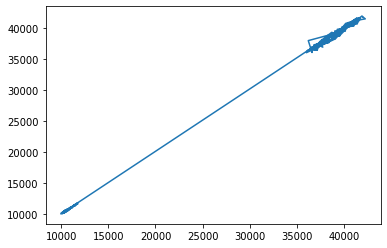

In [4]:
plt.plot(prices_dataset['Open'].values,prices_dataset['Close'].values)
plt.show()

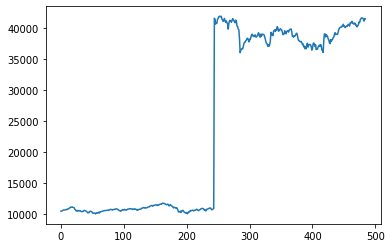

In [5]:
plt.plot(prices_dataset['Close'])
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(prices_dataset['Open'].values.reshape(-1,1))
Y = scaler.fit_transform(prices_dataset['Close'].values.reshape(-1,1))

In [7]:
skf = KFold(n_splits=2,shuffle=True)
skf.get_n_splits(X,Y)

2

In [8]:
#train_size = int(len(prices_dataset) * 0.80)
#test_size = len(prices_dataset) - train_size
#train, test = prices_dataset[0:train_size,:], prices_dataset[train_size:len(prices_dataset),:]
#print(len(train), len(test))

In [9]:
# convert an array of values into a dataset matrix
#def create_dataset(dataset, look_back=1):
	#dataX, dataY = [], []
	#for i in range(len(dataset)-look_back-1):
		#a = dataset[i:(i+look_back), 0]
		#dataX.append(a)
		#dataY.append(dataset[i + look_back, 0])
	#return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
#look_back = 1
#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)

In [11]:
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
#Step 2 Build Model
model = Sequential()

"""model.add(LSTM(
    50,
    input_dim=1,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))"""

model.add(Dense(units=1))
model.add(Activation('linear'))
model.add(Dense(units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.01))
print ('compilation time : ', time.time() - start)

compilation time :  0.013610124588012695


In [13]:

for train_index,test_index in skf.split(X,Y):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  
  X_train = np.array(X_train).reshape(-1,1)
  X_test = np.array(X_test).reshape(-1,1)
  Y_train = np.array(Y_train).reshape(-1,1)
  Y_test = np.array(Y_test).reshape(-1,1)

hist = model.fit(
    X_train,
    Y_train,
    batch_size=1,
    epochs=10,
    validation_data=(X_test, Y_test))

Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 0.2415 - val_loss: 4.9412e-05
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 5.6638e-05 - val_loss: 5.1545e-05
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 5.3105e-05 - val_loss: 5.0666e-05
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 1.0721e-04 - val_loss: 5.1654e-05
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 6.5960e-05 - val_loss: 4.7892e-05
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 5.4303e-05 - val_loss: 5.1126e-05
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 1.0298e-04 - val_loss: 4.7758e-05
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 5.9912e-05 - val_loss: 8.3490e-05
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 8.0985e-05 - val_loss: 4.7626e-05
Epoch 10/10
242/242 [===========

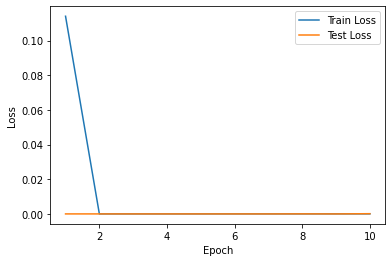

In [14]:
plt.plot(range(1,11),hist.history['loss'],label="Train Loss")
plt.plot(range(1,11),hist.history['val_loss'],label="Test Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## work in progress

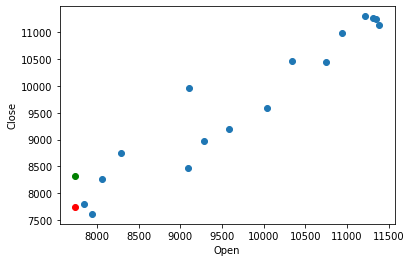

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
o_price = scaler.fit_transform(np.array([7735.15]).reshape(-1,1))
o_price = o_price.reshape(1, 1)
o_price = np.expand_dims(o_price,0)
o_price = scaler.inverse_transform(model.predict(o_price)).reshape(-1,1)

fi = pd.read_csv("/content/drive/MyDrive/Efficiency Analysis of Stock price prediction/final.csv")
plt.scatter(fi['Open'],fi['Close'])
plt.xlabel("Open")
plt.ylabel("Close")
plt.scatter(7735.15,8317.85,color="green") #The actual closing price on that day
plt.scatter(7735.15,o_price,color="red")  #Predicted price on that day
plt.show()

[[7735.156]]
